In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,1
1,1
2,4
3,4
4,0
...,...
319,3
320,4
321,1
322,0


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000217,0.992018,0.000035,0.005699,0.002031,5.087414e-05,2.044931e-01,4.268020e-03,5.255603e-03,7.859324e-01
1,0.999122,0.000038,0.000660,0.000158,0.000022,1.279638e-02,1.243471e-04,9.870588e-01,1.041866e-07,2.036493e-05
2,0.000583,0.983997,0.000093,0.005203,0.010124,1.525148e-04,1.223066e-06,9.998418e-01,1.126067e-06,3.395280e-06
3,0.000458,0.000249,0.127072,0.000655,0.871567,1.744630e-11,6.678933e-09,9.974464e-01,8.525899e-09,2.553636e-03
4,0.000031,0.000252,0.007609,0.000053,0.992056,4.052994e-06,3.601716e-09,2.064842e-01,6.785139e-06,7.935050e-01
5,0.000010,0.001941,0.003339,0.000053,0.994657,9.997050e-01,1.147948e-08,2.943389e-04,6.712469e-07,1.985263e-08
6,0.000026,0.000877,0.005038,0.000035,0.994024,9.991645e-01,1.395224e-07,6.844716e-04,1.507318e-04,2.498971e-07
7,0.000227,0.996164,0.000024,0.002642,0.000943,6.702957e-08,9.990823e-01,2.790377e-06,9.140759e-04,7.001668e-07
8,0.000245,0.000177,0.000575,0.998863,0.000140,9.994998e-01,5.504744e-10,4.759532e-04,1.901539e-05,5.196908e-06
9,0.013209,0.000160,0.011859,0.973135,0.001637,5.399226e-06,3.381433e-05,9.994609e-01,3.919469e-04,1.079280e-04


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000236,0.993477,0.000040,0.003208,0.003038,9.998191e-01,2.022260e-13,1.809532e-04,4.435277e-11,1.172569e-08
1,0.000198,0.990751,0.000048,0.002066,0.006937,9.962251e-01,1.761255e-08,3.720126e-03,5.462237e-05,1.225204e-07
2,0.000007,0.001244,0.002659,0.000033,0.996058,6.874877e-10,9.999766e-01,7.415820e-08,2.049633e-05,2.736725e-06
3,0.000006,0.001201,0.002621,0.000033,0.996139,9.649810e-01,5.809334e-07,3.496265e-02,5.250114e-05,3.249650e-06
4,0.999273,0.000038,0.000493,0.000177,0.000019,9.951508e-01,2.853189e-05,4.414333e-03,6.017123e-05,3.460061e-04
...,...,...,...,...,...,...,...,...,...,...
319,0.000107,0.000283,0.000825,0.998586,0.000200,9.984919e-01,4.846491e-06,1.487286e-03,5.494487e-06,1.049704e-05
320,0.000102,0.000198,0.026759,0.000124,0.972817,9.999852e-01,1.040667e-08,1.270117e-05,2.127347e-06,3.060282e-09
321,0.000245,0.993303,0.000042,0.001499,0.004910,7.694422e-09,1.724275e-12,9.999939e-01,2.946828e-09,6.126897e-06
322,0.999139,0.000044,0.000537,0.000260,0.000020,9.681880e-01,1.081302e-06,2.763054e-02,5.786054e-06,4.174602e-03


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([1, 1, 4, 4, 0, 0, 4, 2, 4, 3, 1, 0, 0, 2, 4, 4, 3, 3, 2, 4, 4, 0,
        4, 1, 0, 1, 0, 1, 3, 2, 3, 0, 0, 0, 4, 0, 1, 4, 1, 3, 0, 2, 4, 1,
        1, 1, 0, 4, 0, 4, 2, 2, 3, 3, 2, 0, 2, 4, 0, 0, 3, 4, 0, 2, 1, 0,
        1, 0, 1, 0, 2, 0, 0, 4, 2, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 3, 1,
        4, 0, 0, 0, 2, 2, 3, 1, 0, 2, 3, 0, 3, 3, 0, 2, 3, 0, 0, 0, 3, 4,
        4, 3, 0, 0, 0, 0, 1, 3, 0, 2, 0, 3, 3, 0, 0, 4, 0, 0, 3, 0, 3, 0,
        0, 1, 3, 3, 0, 2, 3, 0, 2, 0, 0, 4, 1, 3, 4, 0, 0, 1, 1, 3, 1, 0,
        1, 4, 1, 0, 1, 4, 4, 1, 2, 2, 3, 0, 4, 0, 3, 0, 1, 1, 2, 2, 2, 0,
        0, 0, 3, 0, 0, 4, 2, 2, 0, 3, 0, 2, 4, 0, 2, 0, 4, 2, 3, 4, 2, 4,
        0, 2, 0, 3, 3, 0, 4, 3, 0, 1, 0, 1, 2, 0, 3, 1, 4, 2, 1, 2, 2, 4,
        0, 3, 2, 0, 2, 0, 1, 4, 1, 0, 3, 0, 1, 4, 2, 2, 0, 1, 3, 4, 3, 1,
        0, 1, 0, 1, 0, 2, 0, 4, 4, 2, 1, 0, 4, 2, 2, 0, 4, 4, 2, 2, 3, 3,
        1, 4, 4, 4, 4, 2, 0, 1, 3, 2, 0, 2, 0, 1, 3, 4, 0, 0, 0, 2, 4, 1,
        0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9969230769230769

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=1)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
predictions

array([1, 0, 1, 4, 4, 4, 4, 1, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3,
       4, 0, 2, 1, 1, 1, 4, 3, 2, 4, 4, 1, 3, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.97      0.95      0.96        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


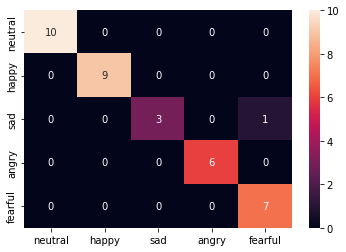

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [29]:
path='/content/drive/My Drive/fusion/savee_fusion_model/KNN/expert6'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
